# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
# %pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 77.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


## Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [3]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f"There are {df_hh_income.shape[0]} rows and {df_hh_income.shape[1]} columns in Median Household Income dataframe.")
print(f"There are {df_pct_poverty.shape[0]} rows and {df_pct_poverty.shape[1]} columns in Percentage People below poverty level dataframe.")
print(f"There are {df_pct_completed_hs.shape[0]} rows and {df_pct_completed_hs.shape[1]} columns in Pct over 25 compleated high school dataframe.")
print(f"There are {df_share_race_city.shape[0]} rows and {df_share_race_city.shape[1]} columns in Share of race by city dataframe.")
print(f"There are {df_fatalities.shape[0]} rows and {df_fatalities.shape[1]} columns in Deaths by police us dataframe.")

There are 29322 rows and 3 columns in Median Household Income dataframe.
There are 29329 rows and 3 columns in Percentage People below poverty level dataframe.
There are 29329 rows and 3 columns in Pct over 25 compleated high school dataframe.
There are 29268 rows and 7 columns in Share of race by city dataframe.
There are 2535 rows and 14 columns in Deaths by police us dataframe.


In [ ]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [ ]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [ ]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [ ]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [ ]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
print(df_hh_income.isna().values.any())
print(df_pct_poverty.isna().values.any())
print(df_fatalities.isna().values.any())
print(df_share_race_city.isna().values.any())
print(df_pct_completed_hs.isna().values.any())

True
False
True
False
False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_hh_income.loc[df_hh_income.isnull().values].head()

,Geographic Area,City,Median Income
29119,WY,Albany CDP,NaN
29121,WY,Alcova CDP,NaN
29123,WY,Alpine Northeast CDP,NaN
29126,WY,Antelope Hills CDP,NaN
29129,WY,Arlington CDP,NaN


In [ ]:
df_fatalities.loc[df_fatalities.isnull().values].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 59 to 2532
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       346 non-null    int64  
 1   name                     346 non-null    object 
 2   date                     346 non-null    object 
 3   manner_of_death          346 non-null    object 
 4   armed                    331 non-null    object 
 5   age                      216 non-null    float64
 6   gender                   346 non-null    object 
 7   race                     87 non-null     object 
 8   city                     346 non-null    object 
 9   state                    346 non-null    object 
 10  signs_of_mental_illness  346 non-null    bool   
 11  threat_level             346 non-null    object 
 12  flee                     262 non-null    object 
 13  body_camera              346 non-null    bool   
dtypes: bool(2), float64(1), 

In [4]:
df_hh_income.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [5]:
df_pct_poverty = df_pct_poverty[df_pct_poverty.poverty_rate != "-"]
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

<ipython-input-5-bbfb782a144f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)


In [6]:
df_pct_poverty.sort_values("poverty_rate", inplace=True, ascending=False)

In [7]:
grouped_data = df_pct_poverty.groupby("Geographic Area", as_index=False).mean()

<ipython-input-7-37a85ed499f0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df_pct_poverty.groupby("Geographic Area", as_index=False).mean()


In [8]:
grouped_data.sort_values("poverty_rate", ascending=False, inplace=True)

In [ ]:
bar = px.bar(
    x=grouped_data.index[:20],
    y=grouped_data.poverty_rate[:20],
    color=grouped_data.index[:20],
    color_continuous_scale="YlOrRd",
    title="US poverty rate"
)

bar.update_layout(
    xaxis_title = "Geographic Areas",
    yaxis_title = "Poverty rate"
)

bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [9]:
df_pct_completed_hs = df_pct_completed_hs[df_pct_completed_hs.percent_completed_hs != "-"]
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

<ipython-input-9-c23df22a6aa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)


In [10]:
hs_grouped_data = df_pct_completed_hs.groupby("Geographic Area", as_index=False).mean()

<ipython-input-10-90ce70a7337f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hs_grouped_data = df_pct_completed_hs.groupby("Geographic Area", as_index=False).mean()


In [11]:
hs_grouped_data.sort_values("percent_completed_hs", ascending=False, inplace=True)

In [ ]:
bar = px.bar(
    x=hs_grouped_data.index[:20],
    y=hs_grouped_data.percent_completed_hs[:20],
    color_continuous_scale="Magma",
    title="US poverty rate"
)

bar.update_layout(
    xaxis_title = "Geographic Areas",
    yaxis_title = "Poverty rate"
)

bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

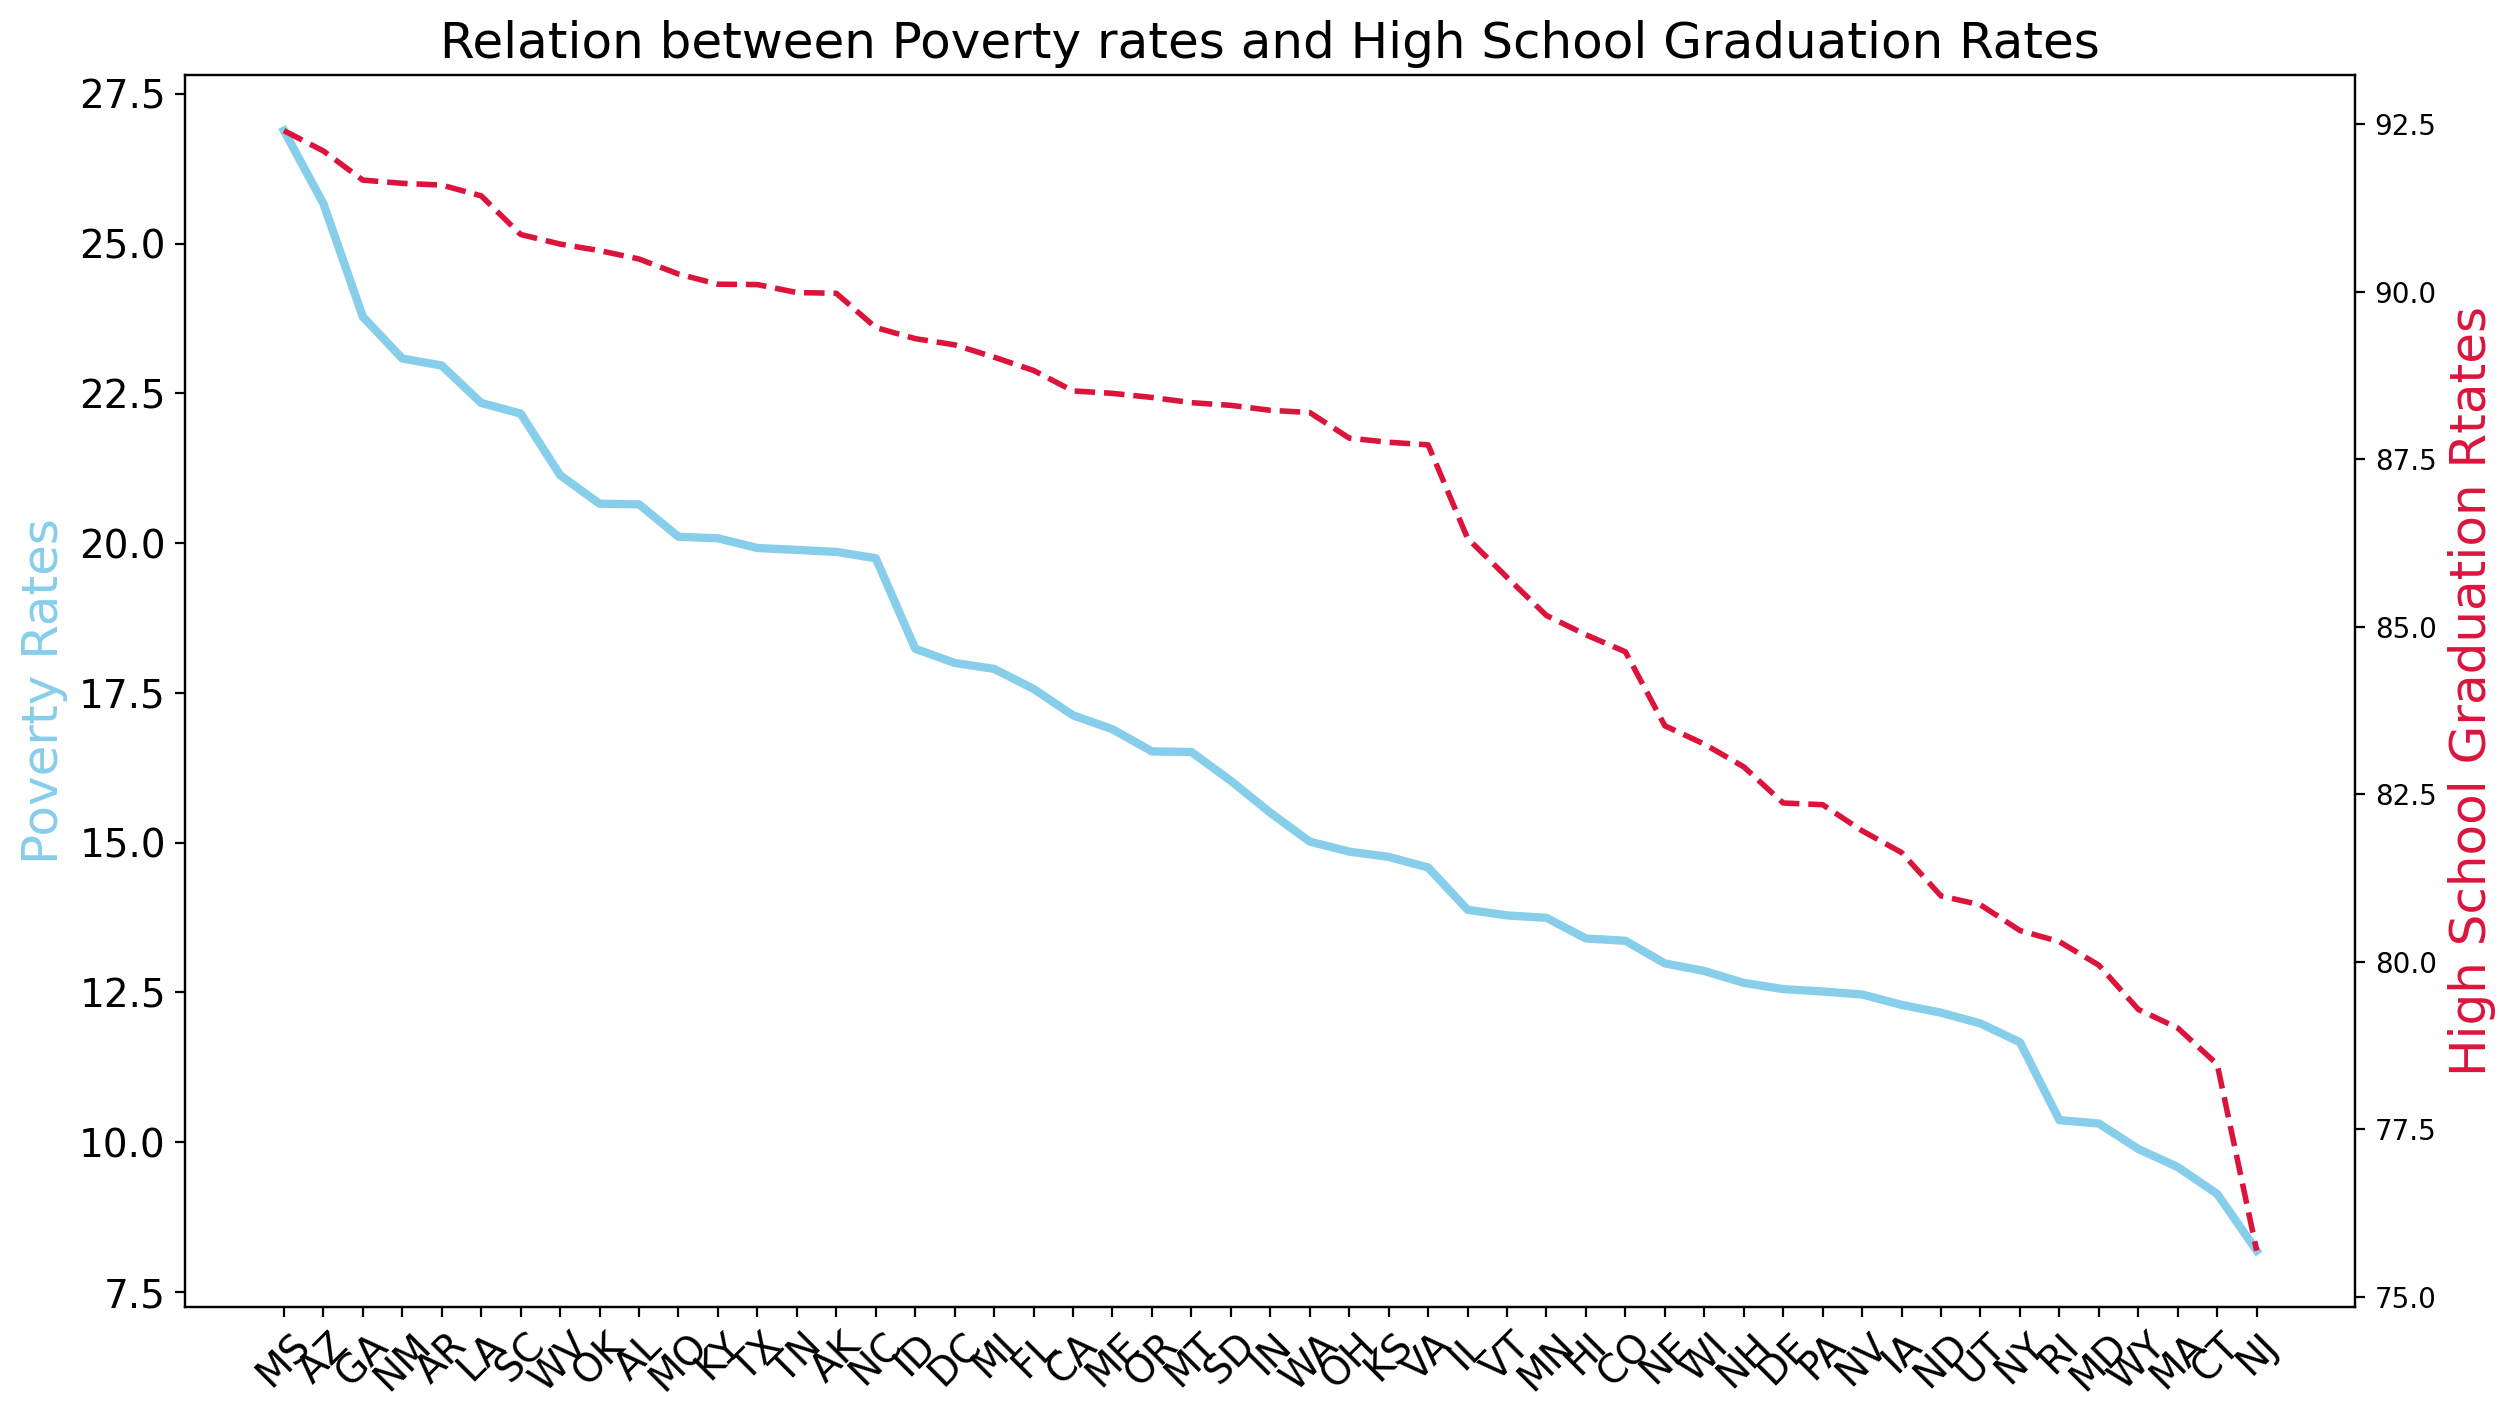

In [ ]:
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Relation between Poverty rates and High School Graduation Rates", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 =ax1.twinx()

ax1.set_ylabel("Poverty Rates", color="skyblue", fontsize=18)
ax2.set_ylabel("High School Graduation Rtates",color="crimson", fontsize=18)

ax1.plot(
    grouped_data["Geographic Area"],
    grouped_data.poverty_rate,
    color="Skyblue",
    linewidth=3,
)

ax2.plot(
    grouped_data["Geographic Area"],
    hs_grouped_data.percent_completed_hs,
    color="crimson",
    linewidth=2,
    linestyle="--"
)

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [12]:
merged_df = pd.merge(grouped_data, hs_grouped_data, on='Geographic Area')

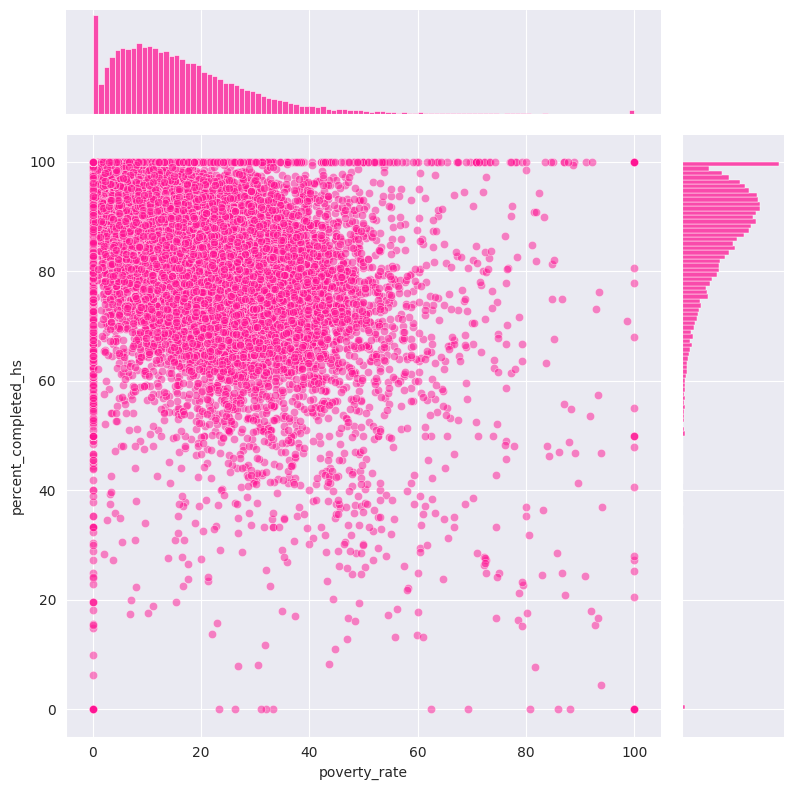

In [ ]:
with sns.axes_style("darkgrid"):
    sns.jointplot(
        x=df_pct_poverty.poverty_rate,
        y=df_pct_completed_hs.percent_completed_hs,
        kind="scatter",
        height=8,
        color="deeppink",
        joint_kws={"alpha":0.5}
    )

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

In [ ]:
merged_df.shape

(51, 3)

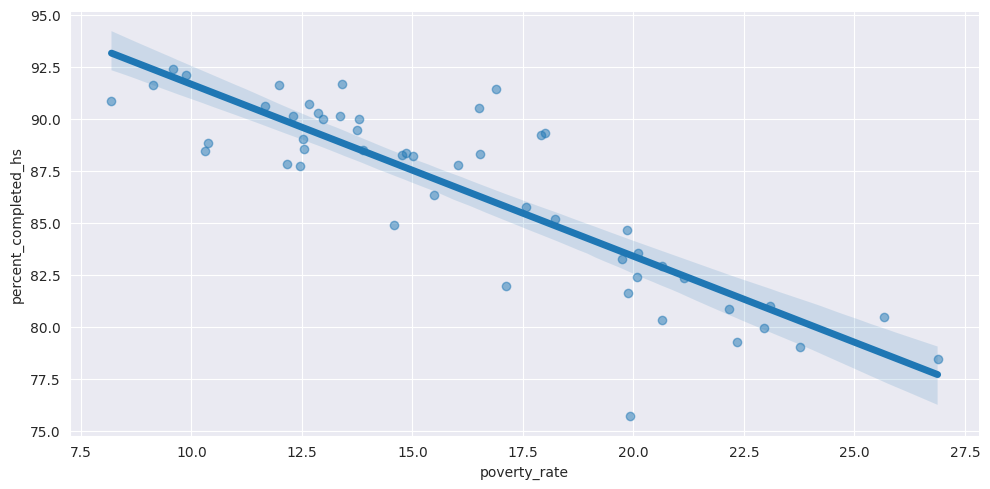

In [ ]:
with sns.axes_style("darkgrid"):
    sns.lmplot(merged_df,
        x="poverty_rate",
        y="percent_completed_hs",
        lowess=False,
        aspect=2,
        scatter_kws={"alpha":0.5},
        line_kws={"linewidth":5}
    )

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30


In [13]:
df_share_race_city = df_share_race_city[df_share_race_city.share_white != "(X)"]
df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white)
df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black)
df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american)
df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian)
df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic)


<ipython-input-13-0ba4b7daede0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white)
<ipython-input-13-0ba4b7daede0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black)
<ipython-input-13-0ba4b7daede0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [14]:
share_grouped_data = df_share_race_city.groupby("Geographic area").mean()
share_grouped_data["Total"] = share_grouped_data["share_white"] + share_grouped_data["share_black"] + share_grouped_data["share_native_american"] + share_grouped_data["share_black"] + share_grouped_data["share_black"]

<ipython-input-14-0716d02aa91d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  share_grouped_data = df_share_race_city.groupby("Geographic area").mean()


In [17]:
share_grouped_data.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic,Total
Geographic area,,,,,,
AK,45.65,0.57,45.86,1.39,2.15,93.22
AL,72.51,23.32,0.66,0.48,2.98,143.13
AR,78.45,16.30,0.76,0.48,4.27,128.10
AZ,59.93,0.95,28.59,0.73,20.14,91.38
CA,71.87,2.69,1.72,5.57,29.65,81.67


In [16]:
grouped = df_share_race_city.groupby('Geographic area').agg("mean").reset_index()

grouped.head()

<ipython-input-16-b484f5b11cc4>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65


In [ ]:
colors = ['rgba(255,0,0,0.7)', 'rgba(0,255,0,0.7)', 'rgba(0,0,255,0.7)', "deeppink", "skyblue"]

# Create a bar chart with colored subsections
fig = go.Figure()

for i, col in enumerate(grouped.columns[1:]):
    fig.add_trace(go.Bar(
        x=grouped['Geographic area'],
        y=grouped[col],
        name=col,
        marker=dict(color=colors[i])
    ))

# Customize layout
fig.update_layout(
    title='Bar Chart with Colored Subsections',
    barmode='stack',  # Change to 'group' if you want grouped bars
    xaxis=dict(title='Geographic Area'),
    yaxis=dict(title='share of race'),
    height=800
)

# Show the plot
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [22]:
grouped_data_mean = grouped.mean()
grouped_data_mean.head()

<ipython-input-22-4ef9d8547e2d>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



share_white             80.97
share_black              7.83
share_native_american    3.61
share_asian              1.84
share_hispanic           7.75
dtype: float64

In [23]:
# Define colors for each value
colors = ['rgba(255,0,0,0.7)', 'rgba(0,255,0,0.7)', 'rgba(0,0,255,0.7)', "deeppink", "skyblue"]

# Create a donut chart with colored subsections
figure = go.Figure()

for i, col in enumerate(grouped.columns[1:]):
    figure.add_trace(go.Pie(
        labels=grouped_data_mean.index,
        values=grouped_data_mean.values,
        name=col,
        marker=dict(colors=colors, line=dict(color='white', width=2)),
        hole=0.3,
        textinfo='none',  # Do not display text on the chart
        hoverinfo='label+percent',
    ))

# Customize layout
figure.update_layout(
    title='Donut Chart with Colored Subsections',
    annotations=[dict(text='Total', x=0.5, y=0.5, font_size=20, showarrow=False)],
)

# Show the plot
figure.show()


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
grouped_data_mw = df_fatalities.groupby("gender").count()
grouped_data_mw

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
F,107,107,107,107,107,104,98,107,107,107,107,104,107
M,2428,2428,2428,2428,2419,2354,2242,2428,2428,2428,2428,2366,2428


In [ ]:
mw_bar = px.bar(
    x=grouped_data_mw.index,
    y=grouped_data_mw.id,
    color=grouped_data_mw.index,
    title="Nnumber of men and women died"
)

mw_bar.update_layout(
    xaxis_title="Gender",
    yaxis_title="No of people died"
)

mw_bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
box_plot = px.box(
    df_fatalities,
    x="gender",
    y="age",
    color="gender"
)

box_plot.show()

In [ ]:
box_plot = px.box(
    df_fatalities,
    x="gender",
    y="manner_of_death",
    color="gender"
)

box_plot.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
group_armed = df_fatalities.groupby("armed").count()
group_armed

,id,name,date,manner_of_death,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
armed,,,,,,,,,,,,,
Taser,9,9,9,9,9,9,6,9,9,9,9,9,9
air conditioner,1,1,1,1,1,1,1,1,1,1,1,1,1
ax,9,9,9,9,9,9,8,9,9,9,9,9,9
baseball bat,8,8,8,8,8,8,7,8,8,8,8,8,8
baseball bat and bottle,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
toy weapon,104,104,104,104,103,104,102,104,104,104,104,104,104
unarmed,171,171,171,171,170,171,170,171,171,171,171,167,171
undetermined,117,117,117,117,112,117,101,117,117,117,117,103,117


In [ ]:
armed_bar = px.pie(group_armed, names=group_armed.index, values=group_armed.id, title="People carried wepons")

armed_bar.update_traces(textinfo="none")
# Show the plot
armed_bar.show()

In [ ]:
df_fatalities.nunique()

id                         2535
name                       2481
date                        879
manner_of_death               2
armed                        68
age                          73
gender                        2
race                          6
city                       1417
state                        51
signs_of_mental_illness       2
threat_level                  3
flee                          4
body_camera                   2
dtype: int64

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
under_25 = ["yes" if age <= 25 else "no" for age in df_fatalities.age]

In [ ]:
df_fatalities["unedr_25"] = under_25

In [ ]:
count_underage = df_fatalities.groupby("unedr_25").count()
underage_bar = px.bar(
    x=count_underage.index,
    y=count_underage.date,
    color=count_underage.index,
    title="How many peoples were under 25 years"
)

underage_bar.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

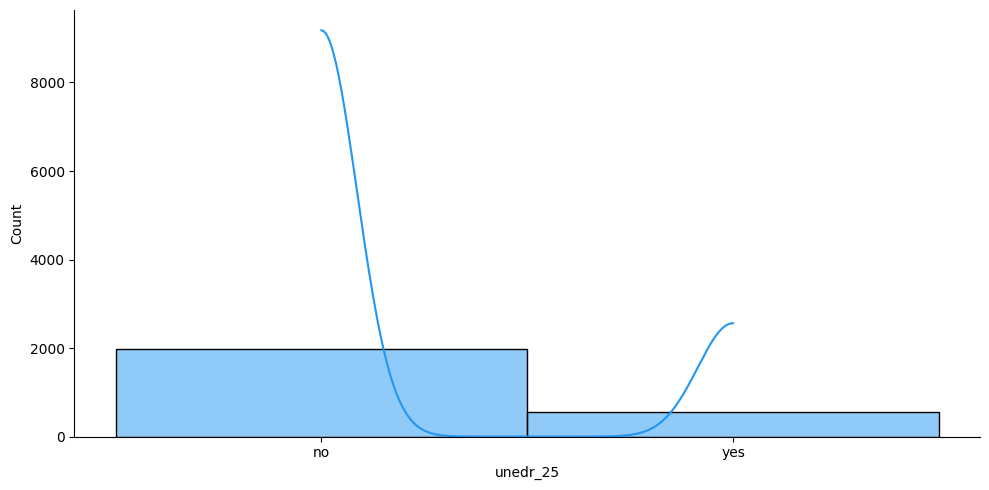

In [ ]:
sns.displot(df_fatalities.unedr_25,
            bins=50,
            aspect=2,
            kde=True,
            color="#2196f3"
            )
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [25]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [26]:
deaths_by_race = df_fatalities.groupby("race").count()

In [27]:
race_bar = px.bar(
    x=deaths_by_race.index,
    y=deaths_by_race.date,
    color=deaths_by_race.index,
    title="Total number of people killed by race",

)

race_bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [28]:
mental = df_fatalities.groupby("signs_of_mental_illness").count()

In [33]:
mental_bar = px.pie(
    names=mental.index,
    values=mental.date,
    title="People killed who were suffering from a mental illness",
)



mental_bar.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [44]:
most_killing_cities = df_fatalities.groupby("city").count()
most_killing_cities.sort_values("date", ascending=False, inplace=True)

In [46]:
city_bar = px.bar(
    x=most_killing_cities.index[:10],
    y=most_killing_cities.date[:10],
    color=most_killing_cities.index[:10],
    color_continuous_scale="YlOrRd",
    title="No of people killed per cities"
)

city_bar.update_layout(
    xaxis_title = "City",
    yaxis_title = "No of people killed"
)

city_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [59]:
df_fatalities.sort_values("city").tail()

state                      2535
signs_of_mental_illness    2535
threat_level               2535
flee                       2470
body_camera                2535
dtype: int64

In [72]:
deaths_rate = df_fatalities.groupby("city", as_index=False)['race'].value_counts()

new_column_names = {'city': 'city', 'race': 'race', "": "count"}
df.rename(columns=new_column_names, inplace=True)

# deaths_rate.sort_values(deaths_rate.value, ascending=False).head()

AttributeError: ignored

In [55]:
deaths_by_race_bar = px.bar(
    x=deaths_rate.city[:10],
    y=deaths_rate.date[:10],
    color=deaths_rate.race[:10],
    color_continuous_scale="YlOrRd",
    title="No of people killed per cities"
)

deaths_by_race_bar.update_layout(
    xaxis_title = "City",
    yaxis_title = "No of people killed"
)

deaths_by_race_bar.show()